<a href="https://colab.research.google.com/github/t3ylla02/t3ylla02-Fysiikan-loppuprojekti-IN00CT09-3006/blob/main/t3ylla02_Fysiikan_loppuprojekti_IN00CT09_3006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

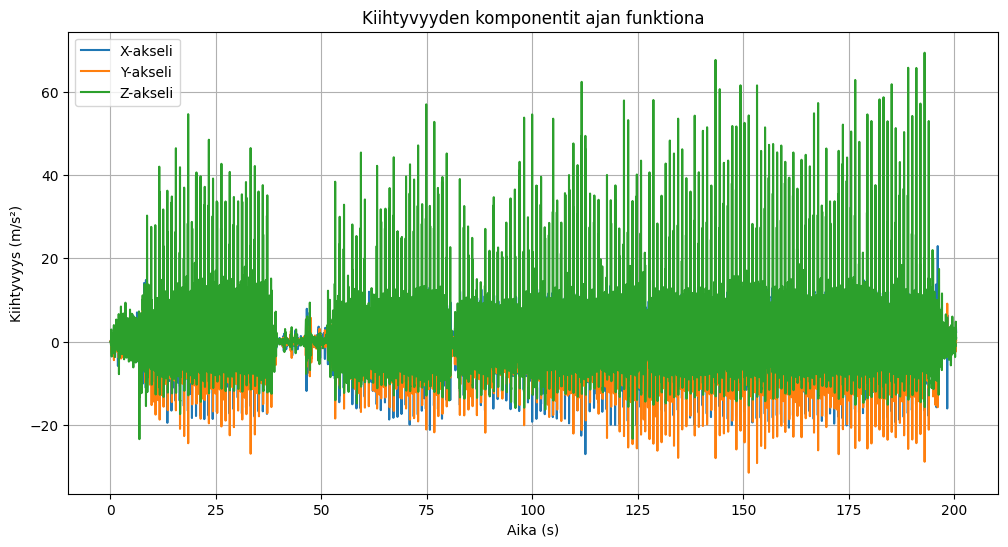

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(accel_data["Time (s)"], accel_data["Linear Acceleration x (m/s^2)"], label="X-akseli")
plt.plot(accel_data["Time (s)"], accel_data["Linear Acceleration y (m/s^2)"], label="Y-akseli")
plt.plot(accel_data["Time (s)"], accel_data["Linear Acceleration z (m/s^2)"], label="Z-akseli")
plt.xlabel("Aika (s)")
plt.ylabel("Kiihtyvyys (m/s²)")
plt.title("Kiihtyvyyden komponentit ajan funktiona")
plt.legend()
plt.grid()
plt.show()


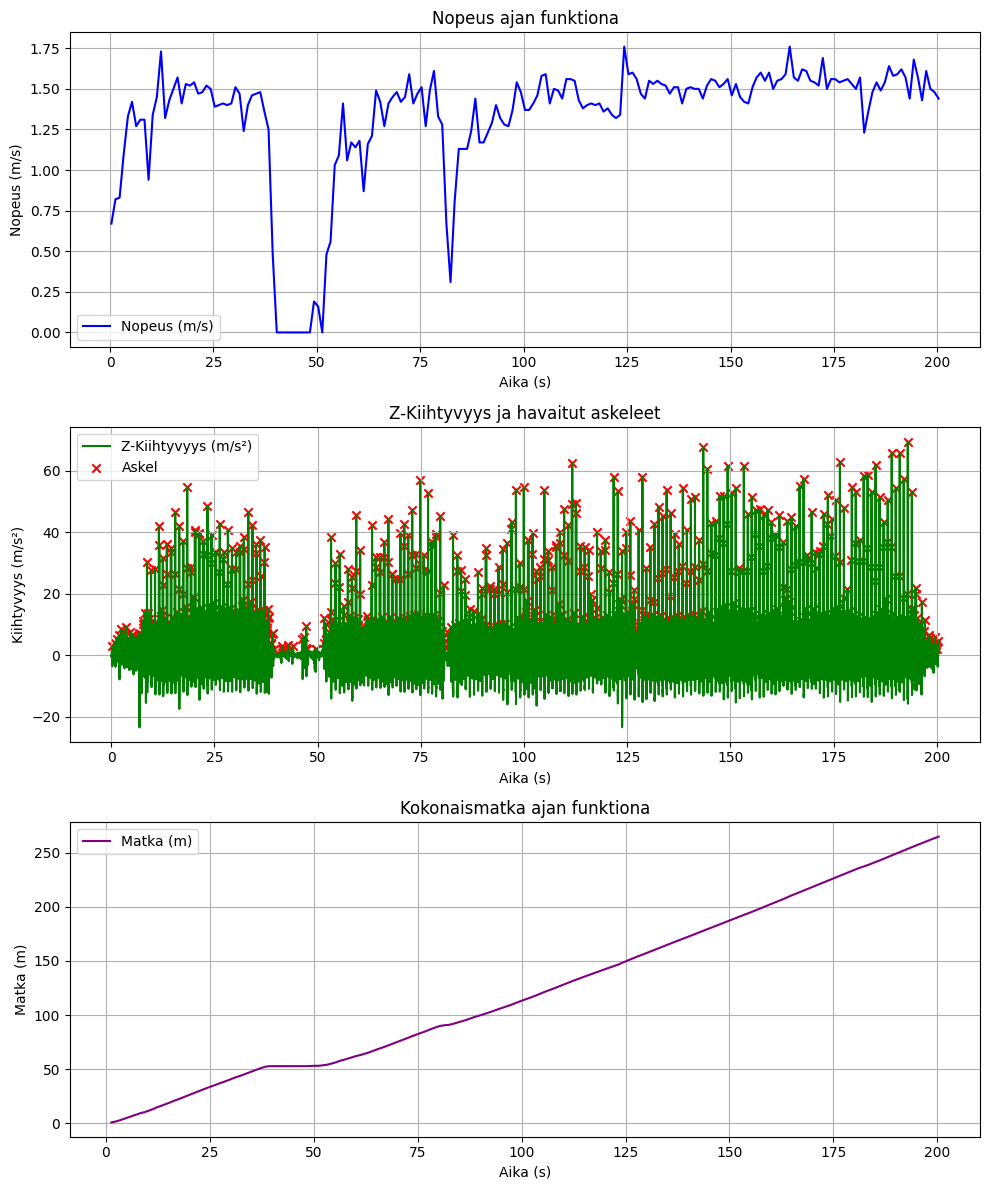


📊 **Lasketut arvot:**
✅ **Kokonaismatka:** 264.73 metriä
✅ **Keskinopeus:** 1.32 m/s (≈ 4.77 km/h)
✅ **Askelmäärä:** 1683 askelta
✅ **Askelpituus:** 15.7 cm



In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(gps_data['Time (s)'], gps_data['Velocity (m/s)'], label='Nopeus (m/s)', color='b')
axs[0].set_xlabel('Aika (s)')
axs[0].set_ylabel('Nopeus (m/s)')
axs[0].set_title('Nopeus ajan funktiona')
axs[0].legend()
axs[0].grid()

axs[1].plot(accel_data['Time (s)'], z_acceleration, label='Z-Kiihtyvyys (m/s²)', color='g')
axs[1].scatter(accel_data['Time (s)'].iloc[peaks], z_acceleration.iloc[peaks], color='r', label='Askel', marker='x')
axs[1].set_xlabel('Aika (s)')
axs[1].set_ylabel('Kiihtyvyys (m/s²)')
axs[1].set_title('Z-Kiihtyvyys ja havaitut askeleet')
axs[1].legend()
axs[1].grid()

axs[2].plot(gps_data['Time (s)'], gps_data['Segment Distance'].cumsum(), label='Matka (m)', color='purple')
axs[2].set_xlabel('Aika (s)')
axs[2].set_ylabel('Matka (m)')
axs[2].set_title('Kokonaismatka ajan funktiona')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

summary = f"""
📊Lasketut arvot:
✅Kokonaismatka:{total_distance:.2f} metriä
✅Keskinopeus:{average_speed:.2f} m/s (≈ {average_speed * 3.6:.2f} km/h)
✅Askelmäärä:{step_count} askelta
✅Askelpituus:{step_length * 100:.1f} cm
"""

print(summary)


In [ ]:
import numpy as np

gps_data['Time Difference'] = gps_data['Time (s)'].diff()
gps_data['Segment Distance'] = gps_data['Velocity (m/s)'] * gps_data['Time Difference']
total_distance = gps_data['Segment Distance'].sum()

total_time = gps_data['Time (s)'].iloc[-1] - gps_data['Time (s)'].iloc[0]
average_speed = total_distance / total_time

from scipy.signal import find_peaks

z_acceleration = accel_data['Linear Acceleration z (m/s^2)']
peaks, _ = find_peaks(z_acceleration, height=2)

step_count = len(peaks)

step_length = total_distance / step_count if step_count > 0 else np.nan

total_distance, average_speed, step_count, step_length


(264.73103613646214, 1.3236795119369698, 1683, 0.15729711000383964)

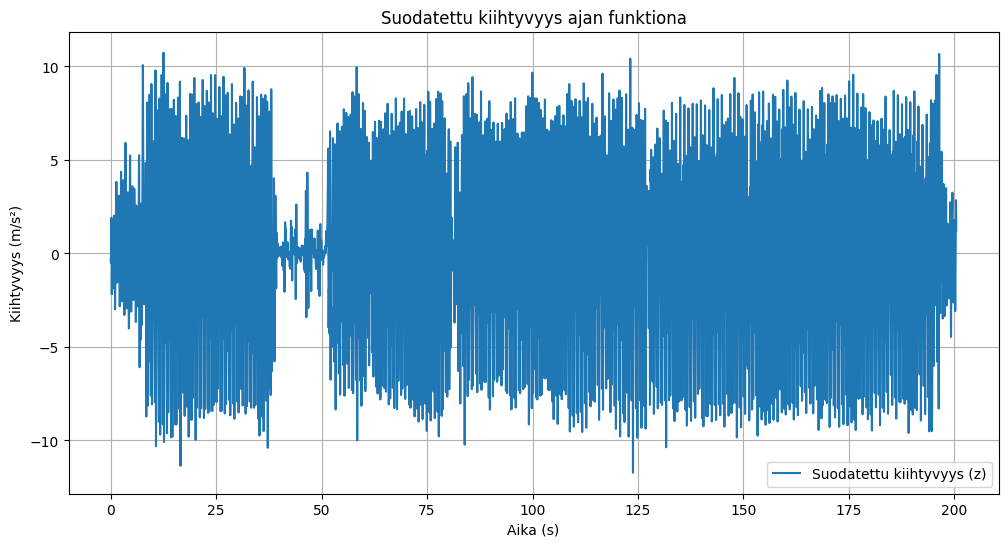

In [ ]:
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff=3, fs=100, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

accel_data["Filtered z"] = lowpass_filter(accel_data["Linear Acceleration z (m/s^2)"])

plt.figure(figsize=(12, 6))
plt.plot(accel_data["Time (s)"], accel_data["Filtered z"], label="Suodatettu kiihtyvyys (z)")
plt.xlabel("Aika (s)")
plt.ylabel("Kiihtyvyys (m/s²)")
plt.title("Suodatettu kiihtyvyys ajan funktiona")
plt.legend()
plt.grid()
plt.show()


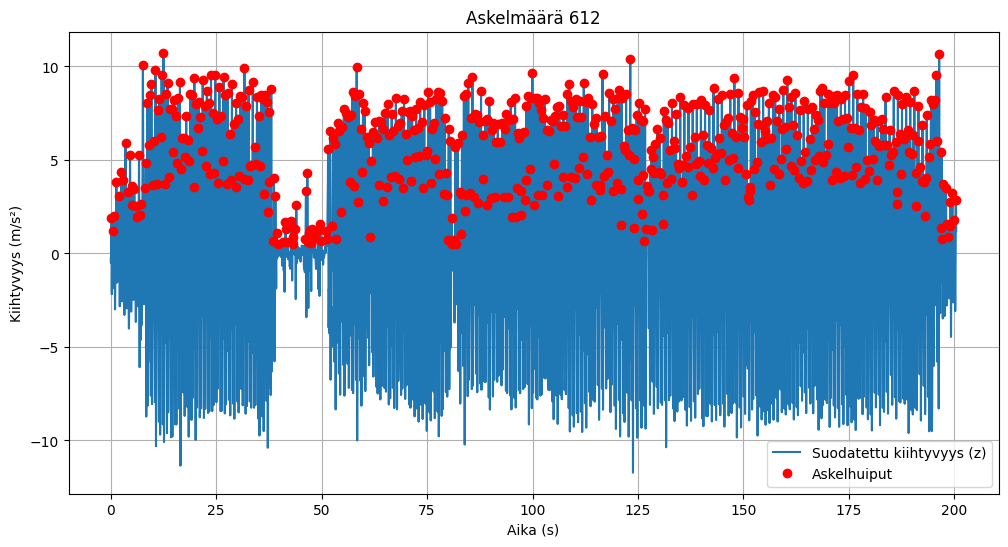

612

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(accel_data["Filtered z"], height=0.5, distance=10)

step_count_filtered = len(peaks)

plt.figure(figsize=(12, 6))
plt.plot(accel_data["Time (s)"], accel_data["Filtered z"], label="Suodatettu kiihtyvyys (z)")
plt.plot(accel_data["Time (s)"].iloc[peaks], accel_data["Filtered z"].iloc[peaks], "ro", label="Askelhuiput")
plt.xlabel("Aika (s)")
plt.ylabel("Kiihtyvyys (m/s²)")
plt.title(f"Askelmäärä {step_count_filtered}")
plt.legend()
plt.grid()
plt.show()

step_count_filtered


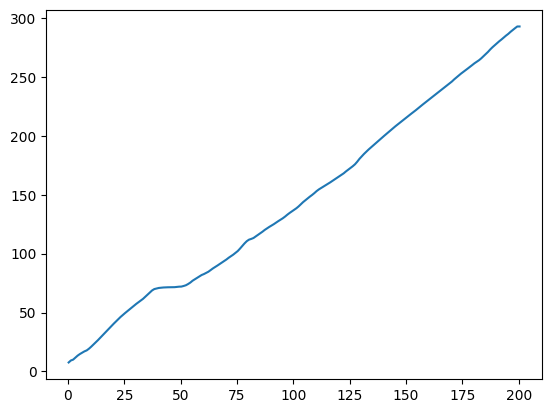

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Time (s)'],df['tot_dist'])

In [ ]:
import folium

start_lat = df['Latitude (°)'].mean()
start_long = df['Longitude (°)'].mean()
my_map = folium.Map(location = [start_lat,start_long], zoom_start = 14)

folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'green', weight = 2.5, opacity = 1).add_to(my_map)
my_map.save('kartta.html')
my_map